In [59]:
import zipfile
import xarray as xr
import netCDF4 as nc
import io

from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Data should be loaded from data/raw
path = "../data/raw/RSS_Windsat_TB_L1C_20170101.zip"


In [100]:
with zipfile.ZipFile(path, "r") as zip_file:
    file_list = zip_file.namelist()

    xarray_list =[]

    for file_name in file_list:
        if file_name.endswith(".nc4"):
            with zip_file.open(file_name) as nc_file:
                pointer = nc_file.read()
                data = io.BytesIO(pointer)
                xarray = xr.open_dataset(data, decode_times=False) # timestamp are all messed up
                xarray = xarray.set_coords(['latitude','longitude'])

                # Selec only ka and ku bands, vertical and horizontal polarization.
                # Also pass time
                variables = [
                    'tb_18',
                    'tb_37',
                    'time',
                    'quality_flag',
                    'earth_incidence_angle',
                    'scan_angle',
                    'earth_azimuth_angle',
                    'pra',
]
                xarray = xarray[variables]

                xarray['tb_18_V'] = xarray['tb_18'].sel(polarization_6=0) # 0 = V 
                xarray['tb_18_H'] = xarray['tb_18'].sel(polarization_6=1) # 1 = H

                xarray = xarray.drop_vars('tb_18')

                xarray['tb_37_V'] = xarray['tb_37'].sel(polarization_6=0) # 0 = V 
                xarray['tb_37_H'] = xarray['tb_37'].sel(polarization_6=1) # 1 = H

                xarray = xarray.drop_vars('tb_37')

                
                xarray_list.append(xarray)

print(len(xarray_list))


C:\Users\andre\AppData\Local\Temp\ipykernel_16244\1191284934.py:31: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  xarray = xarray.drop('tb_18')
C:\Users\andre\AppData\Local\Temp\ipykernel_16244\1191284934.py:36: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  xarray = xarray.drop('tb_37')


13


In [90]:

# time = seconds since 2000-01-01 00:00:00 

def ConvertTime(seconds: float)-> datetime:
    """time = seconds since 2000-01-01 00:00:00 """
    start = datetime(2000,1,1,0,0,0,0)
    time_to_add = timedelta(seconds=seconds)

    corrected_time = start + time_to_add

    return corrected_time



In [ ]:
for xarr in xarray_list:
    print(xarr.time_coverage_start)
    print(xarr.time_coverage_end)
    print()

In [96]:
xarr = xarray_list[0]
# print(xarr.data_vars)
variables = [
    'tb_18',
    'tb_37',
    'time',
    'quality_flag',
    'earth_incidence_angle',
    'scan_angle',
    'earth_azimuth_angle',
    'pra',
]
xarr = xarr[variables]
xarr

<xarray.Dataset> Size: 2GB
Dimensions:                (polarization_6: 6, look: 2, ydim_grid: 1440,
                            xdim_grid: 3120, frequency_band: 5)
Coordinates:
    longitude              (ydim_grid, xdim_grid) float32 18MB ...
    latitude               (ydim_grid, xdim_grid) float32 18MB ...
Dimensions without coordinates: polarization_6, look, ydim_grid, xdim_grid,
                                frequency_band
Data variables:
    tb_18                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    tb_37                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    time                   (ydim_grid, xdim_grid, look, frequency_band) float64 359MB ...
    quality_flag           (ydim_grid, xdim_grid, look, frequency_band) int8 45MB ...
    earth_incidence_angle  (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    scan_angle             (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    earth_azimuth_angle    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    pra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
Attributes: (12/76)
    Conventions:                                 CF-1.7
    title:                                       RSS WindSat TOA Brightness T...
    version:                                     V08.0
    summary:                                     The dataset contains the Lev...
    references:                                   [1] T. Meissner and F. Went...
    acknowledgement:                             Funded under NASA Grant 80NS...
    ...                                          ...
    build_dmrpp_metadata.build_dmrpp:            3.20.13-184
    build_dmrpp_metadata.bes:                    3.20.13-184
    build_dmrpp_metadata.libdap:                 libdap-3.20.11-59
    build_dmrpp_metadata.configuration:          \n# TheBESKeys::get_as_confi...
    build_dmrpp_metadata.invocation:             build_dmrpp -c /tmp/bes_conf...
    history_json:                                [{"$schema":"https:\/\/harmo...

In [99]:
Kaband2d = xarr['tb_37'].sel(polarization_6=0, look=0)


In [97]:
xarr['tb_37']

<xarray.DataArray 'tb_37' (polarization_6: 6, look: 2, ydim_grid: 1440,
                           xdim_grid: 3120)> Size: 216MB
[53913600 values with dtype=float32]
Coordinates:
    longitude  (ydim_grid, xdim_grid) float32 18MB ...
    latitude   (ydim_grid, xdim_grid) float32 18MB ...
Dimensions without coordinates: polarization_6, look, ydim_grid, xdim_grid
Attributes:
    long_name:              TOA brightness temperature of 37.0 GHz band. Pol ...
    standard_name:          brightness_temperature
    units:                  Kelvin
    coverage_content_type:  physicalMeasurement

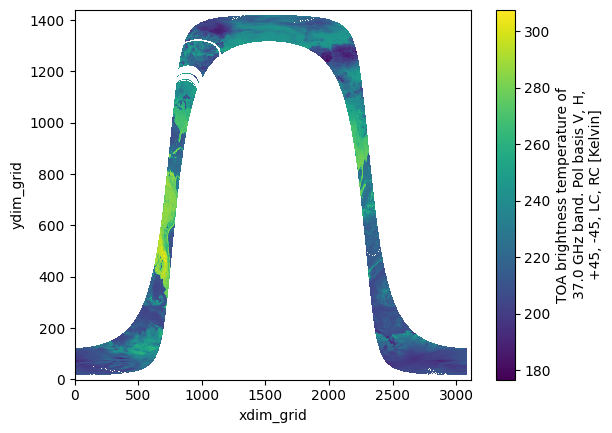

In [83]:
Kaband2d.plot()